In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from PIL import Image

import hopfield
import utilities as uti
# import learning_rules as lrn
# import activation_functions as afn
# from datasets import Dataset_demoletters, Dataset_MNIST, Dataset_Demyan

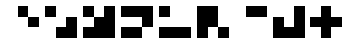

In [2]:
# Generate white noise samples

alphabet_len = 9
im_size = (3, 3)
np.random.seed(42)

white_noise_dataset = np.random.randint(0, 2, 
                                        size=(alphabet_len, im_size[0] * im_size[1]), 
                                        dtype='int') * 2 - 1

for i in range(alphabet_len):
    ax = plt.subplot(1, alphabet_len, i + 1)
    uti.show_letter(white_noise_dataset[i], ax)


The number of memory patterns to be stored is > 14%% of the model size. This may lead to problems.ref: https://doi.org/10.3389/fncom.2016.00144
0 True 0
743
1 True 0
673
2 True 0
555
3 True 0
537
4 True 0
627
5 True 0
717
6 True 0
670
7 True 0
672
8 True 0
658


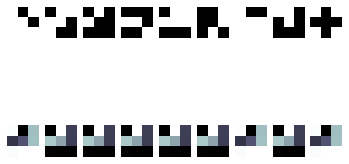

In [3]:
hop_net = hopfield.HopfieldNetwork()
hop_net.run(white_noise_dataset, "hebbian", "async_tanh", 1000)

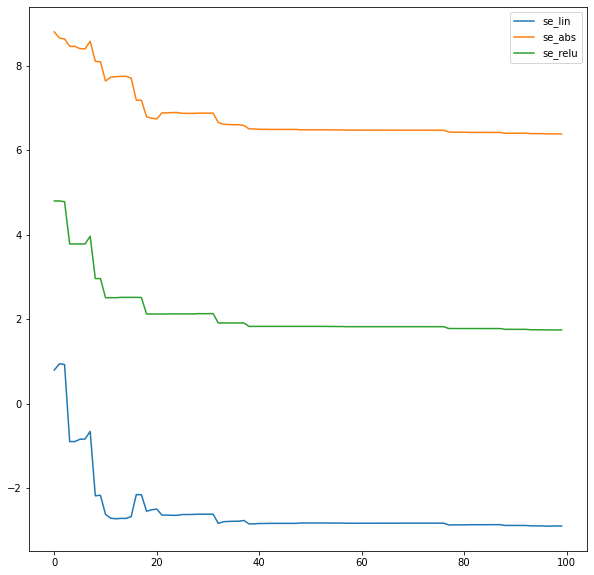

In [4]:
fig, axs = plt.subplots(1, 1, figsize=(10, 10))
ax_energy_time = axs
steps_to_plot = 100
x_range = range(steps_to_plot)

ef_list = ["se_lin", "se_abs", "se_relu"]
energy_runs = []
mean_diffs = [0]

for ef in ef_list:
    energy_runs.append(hop_net.sequence_energy(ef)[:steps_to_plot])

for energy in energy_runs[1:]:
    mean_diffs.append(np.mean(energy_runs[0] - energy))

for i, ef in enumerate(ef_list):
    mean_diffs = [0]*len(ef_list)
    energy_states = energy_runs[i] + mean_diffs[i]
    ax_energy_time.plot(x_range, energy_states, label=ef)
plt.legend()


# energy_states = hop_net.sequence_energy("se_lin")[:steps_to_plot] + 4


# energy_states = hop_net.sequence_energy("se_abs")[:steps_to_plot] - 4
# ax_energy_time.plot(x_range, energy_states, label="abs")

# energy_states = hop_net.sequence_energy("se_relu")[:steps_to_plot]
# ax_energy_time.plot(x_range, energy_states, label="relu")


# ax_energy_time.set_xlabel("Mean energy")
# ax_energy_time.set_ylabel("Mean Timestamp")
# ax_energy_time.set_title("Mean energy v.s. Mean Timestamp")

None


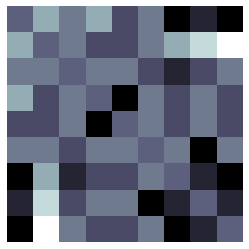

In [5]:
print(uti.show_letter(hop_net.weights))

In [6]:
# pms = [pm]
# neurons = [28 * 28]
# fig, axs = plt.subplots(2, 2, figsize=(10, 10))
# # 1
# ax_num_acc = axs[0][0]
# ax_num_acc.plot(neurons, [np.mean(pm.is_correct) for pm in pms])
# ax_num_acc.set_xlabel('#Neurons')
# ax_num_acc.set_ylabel("Accuracy")
# ax_num_acc.set_xticks(neurons)
# ax_num_acc.set_title(f"#Neuron v.s. Accuracy (#trial = {n_test_samples}, #input_sample={ninput})")


# # ax timestep accuracy
# ax_time_acc = axs[0][1]
# ax_time_acc.scatter([np.mean(pm.time) for pm in pms], [np.mean(pm.is_correct) for pm in pms])
# ax_time_acc.set_xlabel(f"Mean timestamp on {n_test_samples} trials")
# ax_time_acc.set_ylabel("Accuracy")
# ax_time_acc.set_title("Mean timestamp v.s. Accuracy")

# # ax energy accuracy
# ax_energy_acc = axs[1][0]
# ax_energy_acc.scatter([np.mean(pm.energy) for pm in pms], [np.mean(pm.is_correct) for pm in pms])
# ax_energy_acc.set_xlabel(f"Mean energy on {n_test_samples} trials")
# ax_energy_acc.set_ylabel("Accuracy")
# ax_energy_acc.set_title("Mean energy v.s. Accuracy")

# # ax energy accuracy
# ax_energy_time = axs[1][1]
# ax_energy_time.scatter([np.mean(pm.energy) for pm in pms], [np.mean(pm.time) for pm in pms])
# ax_energy_time.set_xlabel("Mean energy")
# ax_energy_time.set_ylabel("Mean Timestamp")
# ax_energy_time.set_title("Mean energy v.s. Mean Timestamp")
